In [1]:
# Import the packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Import the train dataset

df_train = pd.read_csv('train.csv')

In [3]:
# Import the test dataset

df_test = pd.read_csv('test.csv')

**DATA CLEANING**

In [4]:
df_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [6]:
# Finding shape of train data

df_train.shape

(19579, 3)

In [7]:
# Finding shape of test data

df_test.shape

(8392, 2)

In [8]:
label = df_train.author.unique().tolist()
label

['EAP', 'HPL', 'MWS']

In [9]:
# null value

df_train.isnull().sum()

id        0
text      0
author    0
dtype: int64

In [10]:
# Drop the id column

df_train = df_train.drop(columns = ['id'], axis=1)
df_train.head()

,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL


In [11]:
def clean_train_data(x):
    text = x
    text = text.lower()
    
# Remove square brackets
    text = re.sub('\[.*?\]', '', text)
    
# Remove punctuation
    text = re.sub(r'[^\w\s]','',text)
    
# Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('\n', '', text)
    return text

In [12]:
clean_data = df_train.copy()

In [14]:
import re

In [15]:
clean_data['text'] = df_train.text.apply(lambda x : clean_train_data(x))
clean_data.head()

,text,author
0,this process however afforded me no means of a...,EAP
1,it never once occurred to me that the fumbling...,HPL
2,in his left hand was a gold snuff box from whi...,EAP
3,how lovely is spring as we looked from windsor...,MWS
4,finding nothing else not even gold the superin...,HPL


In [16]:
df_train['Number_of_words'] = df_train['text'].apply(lambda x:len(str(x).split()))
df_train

,text,author,Number_of_words
0,"This process, however, afforded me no means of...",EAP,41
1,It never once occurred to me that the fumbling...,HPL,14
2,"In his left hand was a gold snuff box, from wh...",EAP,36
3,How lovely is spring As we looked from Windsor...,MWS,34
4,"Finding nothing else, not even gold, the Super...",HPL,27
...,...,...,...
19574,"I could have fancied, while I looked at it, th...",EAP,20
19575,The lids clenched themselves together as if in...,EAP,10
19576,"Mais il faut agir that is to say, a Frenchman ...",EAP,13
19577,"For an item of news like this, it strikes us i...",EAP,15


**Stopword Removal**

In [17]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [21]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [22]:
remove_stop_data = clean_data.copy()

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
remove_stop_data['text'] = clean_data.text.apply(lambda x : remove_eng_stopwords(x))
remove_stop_data.head()

,text,author
0,process however afforded means ascertaining di...,EAP
1,never occurred fumbling might mere mistake,HPL
2,left hand gold snuff box capered hill cutting ...,EAP
3,lovely spring looked windsor terrace sixteen f...,MWS
4,finding nothing else even gold superintendent ...,HPL


In [27]:
print("Before remove stopwords", len(clean_data['text'][0]))
print("After remove stopwords", len(remove_stop_data['text'][0]))

Before remove stopwords 224
After remove stopwords 154


**VISULATION**

In [30]:
import seaborn as sns

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

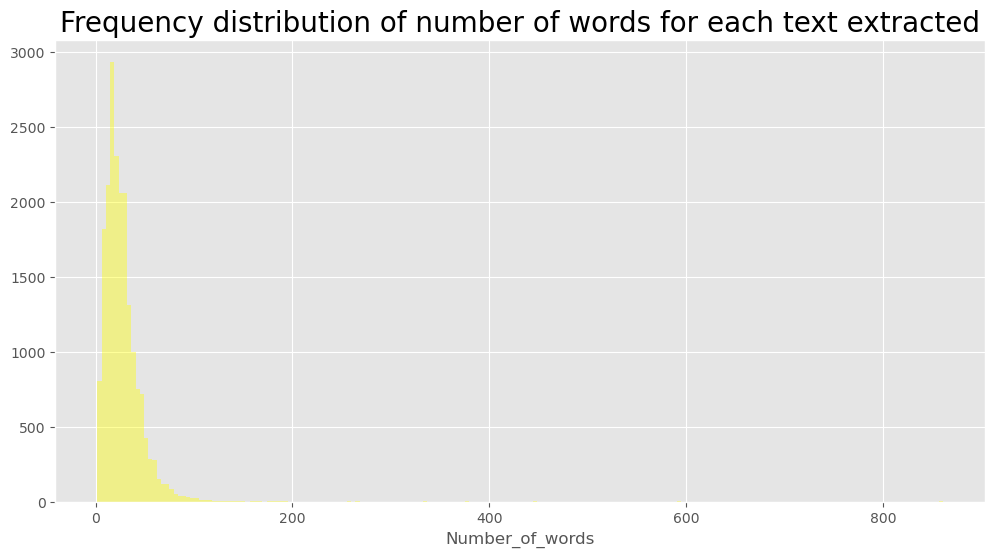

In [31]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df_train['Number_of_words'],kde = False,color="yellow",bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

**Find out common words**

In [32]:
from itertools import chain
from collections import Counter

In [33]:
list_words = remove_stop_data['text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

,index,count
0,one,1614
1,upon,1411
2,could,1316
3,would,1241
4,man,730


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'one'),
  Text(1, 0, 'upon'),
  Text(2, 0, 'could'),
  Text(3, 0, 'would'),
  Text(4, 0, 'man'),
  Text(5, 0, 'time'),
  Text(6, 0, 'yet'),
  Text(7, 0, 'said'),
  Text(8, 0, 'even'),
  Text(9, 0, 'might'),
  Text(10, 0, 'old'),
  Text(11, 0, 'like'),
  Text(12, 0, 'first'),
  Text(13, 0, 'us'),
  Text(14, 0, 'must'),
  Text(15, 0, 'never'),
  Text(16, 0, 'made'),
  Text(17, 0, 'life'),
  Text(18, 0, 'night'),
  Text(19, 0, 'found'),
  Text(20, 0, 'seemed'),
  Text(21, 0, 'eyes'),
  Text(22, 0, 'every'),
  Text(23, 0, 'little'),
  Text(24, 0, 'still'),
  Text(25, 0, 'day'),
  Text(26, 0, 'great'),
  Text(27, 0, 'long'),
  Text(28, 0, 'saw'),
  Text(29, 0, 'many'),
  Text(30, 0, 'well'),
  Text(31, 0, 'came'),
  Text(32, 0, 'much'),
  Text(33, 0, 'may'

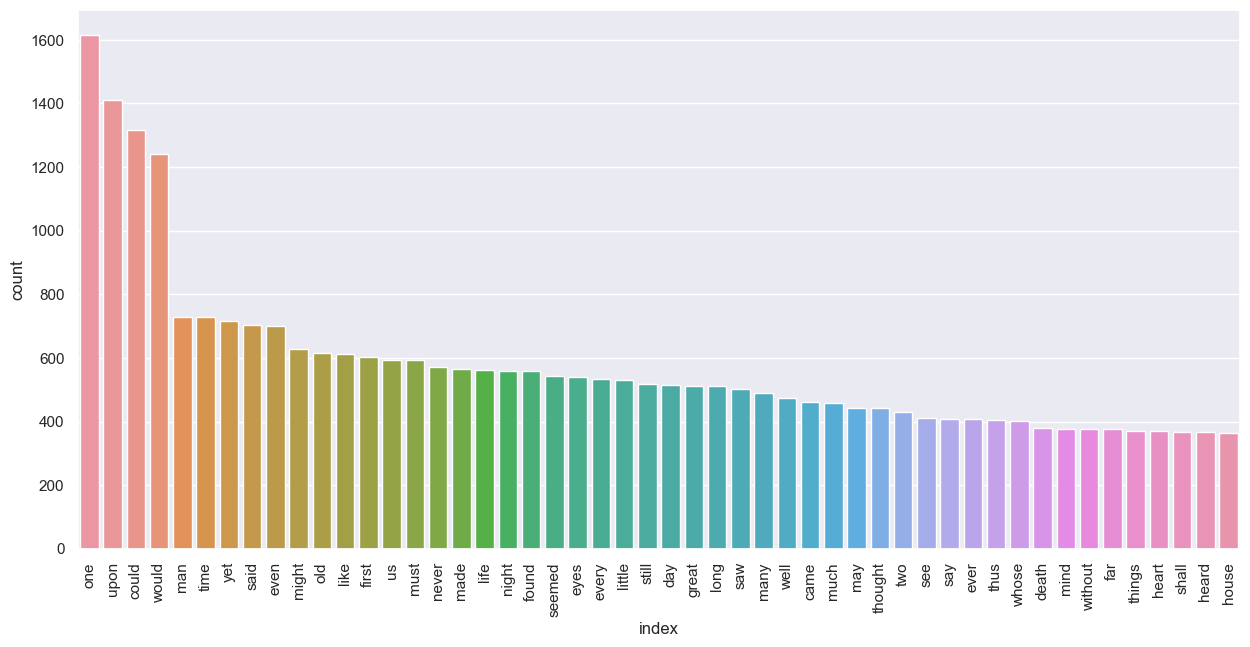

In [34]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

In [35]:
common_words_value = top_common_words['index'].values
remove_words = ['man', 'life', 'night', 'house', 'heart']
new_stop_words = [x for x in common_words_value if x not in remove_words]
new_stop_words

['one',
 'upon',
 'could',
 'would',
 'time',
 'yet',
 'said',
 'even',
 'might',
 'old',
 'like',
 'first',
 'us',
 'must',
 'never',
 'made',
 'found',
 'seemed',
 'eyes',
 'every',
 'little',
 'still',
 'day',
 'great',
 'long',
 'saw',
 'many',
 'well',
 'came',
 'much',
 'may',
 'thought',
 'two',
 'see',
 'say',
 'ever',
 'thus',
 'whose',
 'death',
 'mind',
 'without',
 'far',
 'things',
 'shall',
 'heard']

In [36]:
def remove_new_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in new_stop_words]
    join_text = ' '.join(remove_stop)
    return join_text

In [37]:
new_stop_data = remove_stop_data.copy()

In [38]:
new_stop_data['text'] = remove_stop_data.text.apply(lambda x : remove_new_stopwords(x))
new_stop_data.head()

,text,author
0,process however afforded means ascertaining di...,EAP
1,occurred fumbling mere mistake,HPL
2,left hand gold snuff box capered hill cutting ...,EAP
3,lovely spring looked windsor terrace sixteen f...,MWS
4,finding nothing else gold superintendent aband...,HPL


In [39]:
print("Before remove stopwords", len(remove_stop_data['text'][4]))
print("After remove stopwords", len(new_stop_data['text'][4]))

Before remove stopwords 130
After remove stopwords 125


In [40]:
new_stop_data.to_csv('submission.csv',index=False)